In [64]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [65]:
# Define constants for argon
mass_argon = 39.948  # Atomic mass of argon in atomic mass units (AMU)
sigma_argon = 3.4  # Lennard-Jones sigma parameter for argon in Angstrom
epsilon_argon = 0.238  # Lennard-Jones epsilon parameter for argon in eV
rcut_argon = 2.5 * sigma_argon  # Cutoff distance for LJ potential for argon in Angstrom

In [66]:
#system constants/parameters
kb = 1.38065e-23 #J/K
tfinal = 100
DeltaT = .01
n = ceil(tfinal/DeltaT)
mass = 39.948*1.66054e-27  # Mass of particles in kilograms
lattice_const = 5.26e-10 #meters
#epsilon = 1.65e-21#.0103 #120*kb  #K
epsilon = 120*kb
sigma = .3405e-9 #m
cutoff = 5*sigma #2.5 * sigma  # Cutoff distance for LJ potential
box_size = 10*sigma #5.0e-9  # Size of the simulation box
num_particles = 10  # Number of particles

In [67]:
def lj_pot(r): #lennard-jones potential
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

def lj_force(r): #just negative derivate of potential wrt r
    return 4*epsilon*(12*(sigma**12)/(r**13) - 6*(sigma**6)/(r**7))

In [60]:
def velocity_init_old(mag):
    '''
    Determines particle initial velocities in cartesian coordinates
    Takes in magnitude of velocity, randomizes direction in spherical coordinates,
        and calculates then returns cartesian velocity components
    '''
    phi = random.uniform(0,2*math.pi) #spherical coordinate
    theta = random.uniform(0,math.pi) #spherical coordinate
    x = mag*np.sin(theta)*np.cos(phi)
    y = mag*np.sin(theta)*np.sin(phi)
    z = mag*np.cos(theta)
    return x,y,z

In [68]:
def velocity_init(mag):
    u = random.random()
    v = random.random()
    theta = u * 2.0 * math.pi
    phi = math.acos(2.0 * v - 1.0)
    x = mag * np.sin(phi) * np.cos(theta)
    y = mag * np.sin(phi) * np.sin(theta)
    z = mag * np.cos(phi)
    return x,y,z

In [ ]:
def perform_iteration():
    '''
    '''

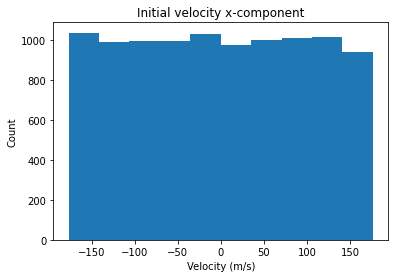

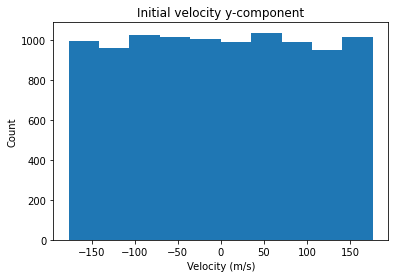

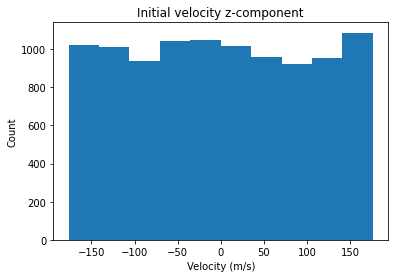

In [62]:
#system setup testing
temperature = 50
num_particles = 10000
K = 1.5*temperature*kb #average particle kinetic energy
v = np.sqrt(2*K/mass) #average particle speed
positions = np.random.uniform(0, box_size, size=(num_particles, 3))
velocities = np.empty(shape=(num_particles,3))
#velocities_lst = []
for i in range(num_particles):
    x,y,z = velocity_init(v)
    velocities[i][0] = x
    velocities[i][1] = y
    velocities[i][2] = z
    #velocities_lst.append(np.sqrt(x*x+y*y+z*z))

plt.hist(velocities[:,0])
plt.title("Initial velocity x-component")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Count")
plt.show()

plt.hist(velocities[:,1])
plt.title("Initial velocity y-component")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Count")
plt.show()

plt.hist(velocities[:,2])
plt.title("Initial velocity z-component")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Count")
plt.show()

#print(velocities_lst)


In [69]:
temperatures = np.linspace(30,120,5)
num_particles = 10
pot_temps = []
for temperature in temperatures: #loop through temperatures
    K = 1.5*temperature*kb #average particle kinetic energy
    v = np.sqrt(2*K/mass) #average particle speed

    t = np.zeros(n)
    positions = np.random.uniform(0, box_size, size=(num_particles, 3))
    velocities = np.empty(shape=(num_particles,3))
    for i in range(num_particles):
        x,y,z = velocity_init(v)
        velocities[i][0] = x
        velocities[i][1] = y
        velocities[i][2] = z

    #potentials = np.zeros(n)
    #kinetics = np.zeros(n)
    # Start integrating using velocity verlet method
    for curr_step in range(n): #looping through number of steps
        accelerations = np.zeros_like(positions)
        curr_potential = 0

        for i in range(num_particles):
            for j in range(i+1,num_particles):
                r_ij = positions[j] - positions[i]
                r_ij -= np.rint(r_ij/box_size)*box_size
                #r_ij[0] = r_ij[0] % box_size
                #r_ij[1] = r_ij[1] % box_size
                #r_ij[2] = r_ij[2] % box_size
                r_mag = np.linalg.norm(r_ij)

                if(r_mag<cutoff):
                    force_directed = lj_force(r_mag)*(r_ij/r_mag)
                    accelerations[i] += force_directed/mass
                    accelerations[j] += -1*force_directed/mass
                    curr_potential += 2*np.abs(lj_pot(r_mag))

        #updates after calculated all of the accelerations
        for i in range(num_particles):
            positions[i] = positions[i] + DeltaT*velocities[i] + accelerations[i]*DeltaT*DeltaT/2
            velocities[i] = velocities[i] + .5*DeltaT*accelerations[i]
            t[i+1] = t[i] + DeltaT
            positions[i][0] = positions[i][0] % box_size
            positions[i][1] = positions[i][1] % box_size
            positions[i][2] = positions[i][2] % box_size

        #kinetics[curr_step] = .5*mass*np.sum(velocities*velocities)
        #potentials[curr_step] = curr_potential

    for i in range(num_particles):
        positions[i][0] = positions[i][0] % box_size
        positions[i][1] = positions[i][1] % box_size
        positions[i][2] = positions[i][2] % box_size
    pot_temps.append(curr_potential)

Text(0.5, 1.0, 'Argon Phase Changes')

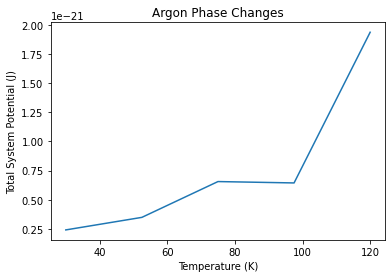

In [71]:
plt.plot(temperatures,pot_temps)
plt.xlabel("Temperature (K)")
plt.ylabel("Total System Potential (J)")
plt.title("Argon Phase Changes")